In [1]:
%matplotlib inline
import os
import opendatasets as od


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.11.0


In [ ]:
# Dowload the dataset
# Execute this cell if you're running this in colab
dataset_url = "https://www.kaggle.com/vaishnaviasonawane/indian-sign-language-dataset"
od.download(dataset_url)

In [2]:

# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("jpg"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

42000


In [3]:
# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
#  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(128, 128, 3)


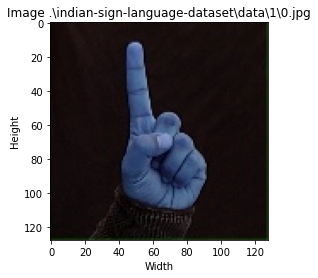

In [4]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array


In [74]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)
  
  # Processing label in image path
  label = path.split("\\")[3]
  if label in ['1','2','3','4','5','6','7','8','9']:
        y.append(int(label))
  else:
    y.append(int(ord(label)-56))
# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 80, 160, 3) # Needed to reshape so CNN knows it's different images
y = np.array(y) #string to unicode

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  42000
Labels loaded:  42000
1 .\indian-sign-language-dataset\data\1\0.jpg


In [75]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [76]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential,Model

In [77]:
WEIGHTS_FILE = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

inception_v3_model = keras.applications.inception_v3.InceptionV3(
    input_shape = (80, 160, 3), 
    include_top = False, 
    weights = 'imagenet'
)

inception_v3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 80, 160, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_473 (Conv2D)            (None, 39, 79, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_470 (Batch  (None, 39, 79, 32)  96          ['conv2d_473[0][0]']             
 Normalization)                                                                                   
                                                                                       

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_480 (Batch  (None, 7, 17, 96)   288         ['conv2d_483[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_481 (Batch  (None, 7, 17, 32)   96          ['conv2d_484[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_475 (Activation)    (None, 7, 17, 64)    0           ['batch_normalization_475[0][0]']
                                                                                                  
 activatio

 activation_492 (Activation)    (None, 7, 17, 64)    0           ['batch_normalization_492[0][0]']
                                                                                                  
 conv2d_493 (Conv2D)            (None, 7, 17, 48)    13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_496 (Conv2D)            (None, 7, 17, 96)    55296       ['activation_492[0][0]']         
                                                                                                  
 batch_normalization_490 (Batch  (None, 7, 17, 48)   144         ['conv2d_493[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_493 (Batch  (None, 7, 17, 96)   288         ['conv2d_496[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 3, 8, 768)    0           ['activation_496[0][0]',         
                                                                  'activation_499[0][0]',         
                                                                  'max_pooling2d_25[0][0]']       
                                                                                                  
 conv2d_507 (Conv2D)            (None, 3, 8, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_504 (Batch  (None, 3, 8, 128)   384         ['conv2d_507[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_504 (Activation)    (None, 3, 8, 128)    0           ['batch_normalization_504[0][0]']
          

                                                                                                  
 batch_normalization_514 (Batch  (None, 3, 8, 160)   480         ['conv2d_517[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_514 (Activation)    (None, 3, 8, 160)    0           ['batch_normalization_514[0][0]']
                                                                                                  
 conv2d_518 (Conv2D)            (None, 3, 8, 160)    179200      ['activation_514[0][0]']         
                                                                                                  
 batch_normalization_515 (Batch  (None, 3, 8, 160)   480         ['conv2d_518[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_528 (Conv2D)            (None, 3, 8, 160)    179200      ['activation_524[0][0]']         
                                                                                                  
 batch_normalization_525 (Batch  (None, 3, 8, 160)   480         ['conv2d_528[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_525 (Activation)    (None, 3, 8, 160)    0           ['batch_normalization_525[0][0]']
                                                                                                  
 conv2d_524 (Conv2D)            (None, 3, 8, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_52

                                                                                                  
 activation_535 (Activation)    (None, 3, 8, 192)    0           ['batch_normalization_535[0][0]']
                                                                                                  
 conv2d_534 (Conv2D)            (None, 3, 8, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_539 (Conv2D)            (None, 3, 8, 192)    258048      ['activation_535[0][0]']         
                                                                                                  
 batch_normalization_531 (Batch  (None, 3, 8, 192)   576         ['conv2d_534[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 conv2d_547 (Conv2D)            (None, 3, 8, 192)    258048      ['activation_543[0][0]']         
                                                                                                  
 batch_normalization_540 (Batch  (None, 3, 8, 192)   576         ['conv2d_543[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_544 (Batch  (None, 3, 8, 192)   576         ['conv2d_547[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_540 (Activation)    (None, 3, 8, 192)    0           ['batch_normalization_540[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_548 (Activation)    (None, 1, 3, 384)    0           ['batch_normalization_548[0][0]']
                                                                                                  
 activation_549 (Activation)    (None, 1, 3, 384)    0           ['batch_normalization_549[0][0]']
                                                                                                  
 activation_552 (Activation)    (None, 1, 3, 384)    0           ['batch_normalization_552[0][0]']
                                                                                                  
 activation_553 (Activation)    (None, 1, 3, 384)    0           ['batch_normalization_553[0][0]']
                                                                                                  
 batch_normalization_554 (Batch  (None, 1, 3, 192)   576         ['conv2d_557[0][0]']             
 Normaliza

                                                                                                  
 activation_562 (Activation)    (None, 1, 3, 384)    0           ['batch_normalization_562[0][0]']
                                                                                                  
 batch_normalization_563 (Batch  (None, 1, 3, 192)   576         ['conv2d_566[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_555 (Activation)    (None, 1, 3, 320)    0           ['batch_normalization_555[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 3, 768)    0           ['activation_557[0][0]',         
                                                                  'activation_558[0][0]']         
          

In [78]:
inception_output_layer = inception_v3_model.get_layer('mixed7')
print('Inception model output shape:', inception_output_layer.output_shape)

inception_output = inception_v3_model.output

Inception model output shape: (None, 3, 8, 768)


In [79]:
from tensorflow.keras import layers
x = layers.GlobalAveragePooling2D()(inception_output)
x = layers.Dense(1024, activation='relu')(x)                  
x = layers.Dense(35, activation='softmax')(x)           

model = Model(inception_v3_model.input, x) 


In [80]:
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.


In [81]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
460/460 - 2080s - loss: 0.1520 - accuracy: 0.9736 - val_loss: 21.6348 - val_accuracy: 0.6187 - 2080s/epoch - 5s/step
Epoch 2/5
460/460 - 2705s - loss: 0.0645 - accuracy: 0.9898 - val_loss: 5.2070 - val_accuracy: 0.5598 - 2705s/epoch - 6s/step
Epoch 3/5
460/460 - 1799s - loss: 0.0526 - accuracy: 0.9911 - val_loss: 0.0192 - val_accuracy: 0.9885 - 1799s/epoch - 4s/step
Epoch 4/5
460/460 - 2009s - loss: 0.0099 - accuracy: 0.9982 - val_loss: 3.2584e-06 - val_accuracy: 1.0000 - 2009s/epoch - 4s/step
Epoch 5/5
460/460 - 1803s - loss: 7.0279e-04 - accuracy: 0.9998 - val_loss: 7.6027e-07 - val_accuracy: 1.0000 - 1803s/epoch - 4s/step


In [82]:
model.save('handrecognition_model.h5')

In [83]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

394/394 [==============================] - 93s 236ms/step - loss: 7.6027e-07 - accuracy: 1.0000
Test accuracy: 100.00%


In [84]:
predictions = model.predict(X_test) # Make predictions towards the test set

394/394 [==============================] - 98s 239ms/step


In [85]:
np.argmax(predictions[0]), y_test[0] # If same, got it right

(5, 5)

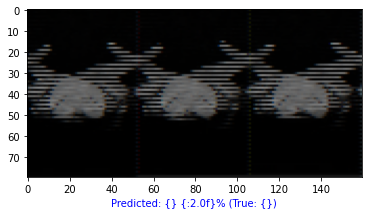

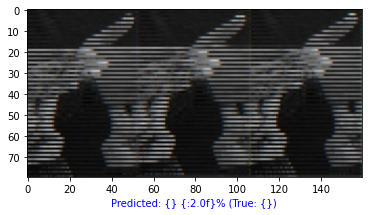

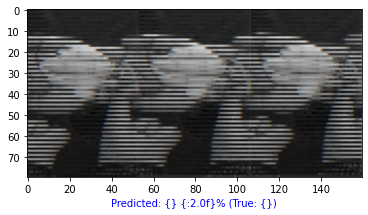

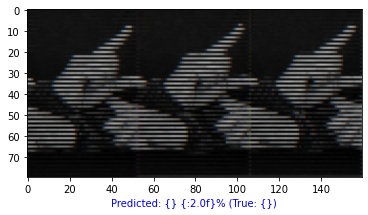

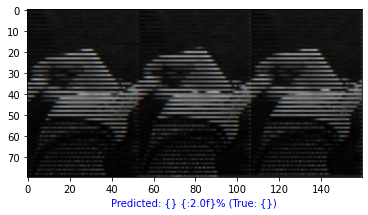

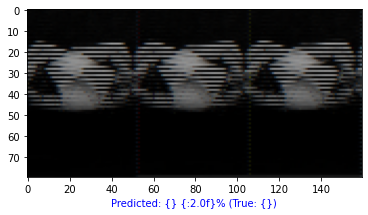

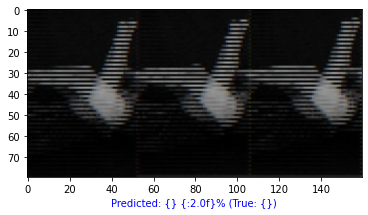

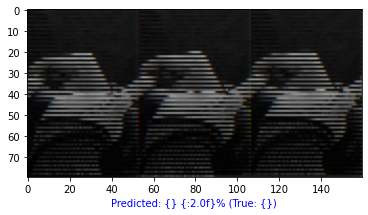

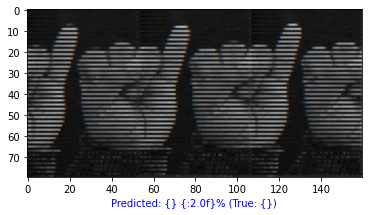

In [95]:
for i in range(1,10):
    prediction = predictions[i]
    true_label = y_test[i]
    img = X_test[i]
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("Predicted: {} {:2.0f}% (True: {})"
                                  ,color=color)

    plt.show()
